## ROWxCOLUMNS Stress test

In [3]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
import pandas as pd
from scripts.data_size_stress_test import dataset_window_analyze_stress_test
import timeit
import requests

In [4]:
s  = requests.Session()
s.verify = False
con = AaaS("https://arxaas.nais.preprod.local", client=s)

In [5]:
shapes = [(n, int(n*0.00001)+1) for n in range(50000, 1050000, 50000)]
shapes

[(50000, 1),
 (100000, 2),
 (150000, 2),
 (200000, 3),
 (250000, 3),
 (300000, 4),
 (350000, 4),
 (400000, 5),
 (450000, 5),
 (500000, 6),
 (550000, 6),
 (600000, 7),
 (650000, 7),
 (700000, 8),
 (750000, 8),
 (800000, 9),
 (850000, 9),
 (900000, 10),
 (950000, 10),
 (1000000, 11)]

In [7]:
result_dict = {}
for result in dataset_window_analyze_stress_test(shapes=shapes, connector=con):
    result_dict.update(result)

/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/ARXaaS-load-testing/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestW

SystemError: {"timestamp":"2019-04-11T12:03:08.547+0000","message":"Handler dispatch failed; nested exception is java.lang.OutOfMemoryError: Java heap space","details":"uri=/api/analyze"}

In [18]:
9922885 * 10**-6

9.922884999999999

In [20]:
row_column_dict = {rowxcol:value[0] for rowxcol, value in result_dict.items()}

In [21]:
result_df = pd.DataFrame.from_dict(row_column_dict, orient="index", columns=["time"])

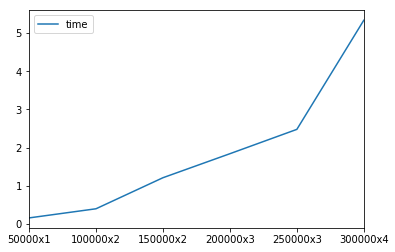

In [23]:
result_df.plot();

In [28]:
mb_size_dict = {(value[1] * 10**-6):value[0] for rowxcol, value in result_dict.items()}

In [29]:
result_df = pd.DataFrame.from_dict(mb_size_dict, orient="index", columns=["time"])
result_df

,time
0.838946,0.162363
1.991181,0.401352
3.042332,1.213406
5.293013,1.841402
6.643854,2.478029
9.922885,5.331876


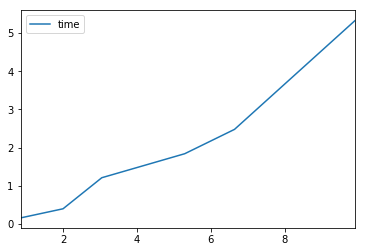

In [30]:
result_df.plot();